In [1]:
import pandas as pd

# Path to the Excel file
file_path = r"C:\Users\ishar\OneDrive\Documents\edulyt\Data-&-Problem-Statement---Project----2\Credit card transactions - Project - 2.csv"

# Load the data from the Excel file
df = pd.read_csv(file_path)

In [2]:
# Task 1: Top 5 Cities with Highest Spends and Their Contribution to Total Credit Card Spends
city_spends = df.groupby('City')['Amount'].sum().reset_index()
total_spend = city_spends['Amount'].sum()
top_5_cities = city_spends.sort_values(by='Amount', ascending=False).head(5)
top_5_cities['Contribution (%)'] = (top_5_cities['Amount'] / total_spend) * 100
print("Task 1: Top 5 Cities with Highest Spends and Their Contribution")
print(top_5_cities)

Task 1: Top 5 Cities with Highest Spends and Their Contribution
                      City     Amount  Contribution (%)
170  Greater Mumbai, India  576751476         14.153989
71        Bengaluru, India  572326739         14.045402
8         Ahmedabad, India  567794310         13.934172
126           Delhi, India  556929212         13.667533
267         Kolkata, India  115466943          2.833660


In [3]:
# Task 2: Highest Spend Month and Amount for Each Card Type
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df['Month-Year'] = df['Date'].dt.to_period('M')
monthly_spends = df.groupby(['Card Type', 'Month-Year'])['Amount'].sum().reset_index()
highest_spend_per_card = monthly_spends.loc[monthly_spends.groupby('Card Type')['Amount'].idxmax()]
print("\nTask 2: Highest Spend Month and Amount for Each Card Type")
print(highest_spend_per_card)


Task 2: Highest Spend Month and Amount for Each Card Type
    Card Type Month-Year    Amount
15       Gold    2015-01  55455064
30   Platinum    2014-08  57936507
42  Signature    2013-12  58799522
77     Silver    2015-03  59723549


In [4]:
# Task 3: Print Transaction Details for Each Card Type with Spend > 100,000
df['Cumulative Amount'] = df.groupby('Card Type')['Amount'].cumsum()
transactions_above_100k = df[df['Cumulative Amount'] > 100000]
transactions_above_100k_details = transactions_above_100k[['Card Type', 'Date', 'Amount', 'City', 'Gender', 'Cumulative Amount']]
print("\nTask 3: Transaction Details with Cumulative Spend > 100,000")
print(transactions_above_100k_details)


Task 3: Transaction Details with Cumulative Spend > 100,000
       Card Type       Date  Amount                   City Gender  \
2         Silver 2014-08-27  101738       Bengaluru, India      F   
3      Signature 2014-04-12  123424  Greater Mumbai, India      F   
4           Gold 2015-05-05  171574       Bengaluru, India      F   
5         Silver 2014-09-08  100036           Delhi, India      F   
6           Gold 2015-02-24  143250           Delhi, India      F   
...          ...        ...     ...                    ...    ...   
26047     Silver 2014-06-22  128191         Kolkata, India      F   
26048  Signature 2014-08-03  246316            Pune, India      M   
26049     Silver 2015-01-16  265019       Hyderabad, India      M   
26050     Silver 2014-09-14   88174          Kanpur, India      M   
26051  Signature 2013-10-19  184410       Hyderabad, India      M   

       Cumulative Amount  
2                 101738  
3                 123424  
4                 254049  
5 

In [5]:
# Task 4: City with Lowest Percentage Spend for Gold Card Type
gold_data = df[df['Card Type'] == 'Gold']
gold_city_spends = gold_data.groupby('City')['Amount'].sum().reset_index()
gold_total_spend = gold_city_spends['Amount'].sum()
gold_city_spends['Percentage Spend'] = (gold_city_spends['Amount'] / gold_total_spend) * 100
lowest_gold_spend_city = gold_city_spends.sort_values(by='Percentage Spend').head(1)
print("\nTask 4: City with Lowest Percentage Spend for Gold Card Type")
print(lowest_gold_spend_city)


Task 4: City with Lowest Percentage Spend for Gold Card Type
               City  Amount  Percentage Spend
99  Dhamtari, India    1416          0.000144


In [6]:
# Task 5: Highest, Lowest, and Equal Contribution of Spends by Expense Type
expense_type_summary = df.groupby('Exp Type')['Amount'].agg(['max', 'min', 'mean']).reset_index()
print("\nTask 5: Highest, Lowest, and Equal Contribution of Spends by Expense Type")
print(expense_type_summary)


Task 5: Highest, Lowest, and Equal Contribution of Spends by Expense Type
        Exp Type     max   min           mean
0          Bills  998077  1026  178627.899370
1  Entertainment  299936  1061  152548.831583
2           Food  299837  1018  150965.405272
3           Fuel  299905  1038  150111.436371
4        Grocery  299920  1005  151074.447413
5         Travel  299618  1070  148042.833333


In [7]:
# Task 6: Gender and Expense Type Combination with Highest Month-over-Month Growth in Jan 2014
jan_2014_data = df[(df['Date'] >= '2014-01-01') & (df['Date'] < '2014-02-01')]
jan_2014_group = jan_2014_data.groupby(['Gender', 'Exp Type'])['Amount'].sum().reset_index()
jan_2014_growth = jan_2014_group.sort_values(by='Amount', ascending=False).head(1)
print("\nTask 6: Gender and Expense Type Combination with Highest Month-over-Month Growth in Jan 2014")
print(jan_2014_growth)


Task 6: Gender and Expense Type Combination with Highest Month-over-Month Growth in Jan 2014
  Gender Exp Type    Amount
0      F    Bills  25114249


In [8]:
# Task 7: Weekends with Highest Total Spend in a Transaction's Ratio
df['Weekday'] = df['Date'].dt.weekday
df['Is_Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)
weekend_spends = df[df['Is_Weekend'] == 1]['Amount'].sum()
weekday_spends = df[df['Is_Weekend'] == 0]['Amount'].sum()
weekend_ratio = weekend_spends / weekday_spends
print("\nTask 7: Weekends with Highest Total Spend in a Transaction's Ratio")
print(weekend_ratio)


Task 7: Weekends with Highest Total Spend in a Transaction's Ratio
0.40979399636635944


In [9]:
# Task 8: Day of the Week with Highest Spend to Total No. of Transactions Ratio
day_spends = df.groupby('Weekday')['Amount'].sum().reset_index()
day_transactions = df.groupby('Weekday').size().reset_index(name='Transactions')
day_ratio = pd.merge(day_spends, day_transactions, on='Weekday')
day_ratio['Spend to Transaction Ratio'] = day_ratio['Amount'] / day_ratio['Transactions']
highest_day_ratio = day_ratio.sort_values(by='Spend to Transaction Ratio', ascending=False).head(1)
print("\nTask 8: Day of the Week with Highest Spend to Total No. of Transactions Ratio")
print(highest_day_ratio)



Task 8: Day of the Week with Highest Spend to Total No. of Transactions Ratio
   Weekday     Amount  Transactions  Spend to Transaction Ratio
1        1  588289572          3697               159126.202867


In [10]:
# Task 9: City Reaching 500th Transaction Fastest
df['Transaction Count'] = df.groupby('City').cumcount() + 1
city_500th_transaction = df[df['Transaction Count'] == 500].sort_values(by='Date').head(1)
print("\nTask 9: City Reaching 500th Transaction Fastest")
print(city_500th_transaction)


Task 9: City Reaching 500th Transaction Fastest
       index          City       Date Card Type Exp Type Gender  Amount  \
23918  23918  Surat, India 2013-11-05    Silver     Food      M  145588   

      Month-Year  Cumulative Amount  Weekday  Is_Weekend  Transaction Count  
23918    2013-11          993997172        1           0                500  


First few rows of the grouped DataFrame:
  Card Type Month-Year    Amount
0      Gold    2013-10  48207082
1      Gold    2013-11  48555781
2      Gold    2013-12  47977692
3      Gold    2014-01  54691140
4      Gold    2014-02  45377610

DataFrame columns: Index(['Card Type', 'Month-Year', 'Amount'], dtype='object')

Checking for NaN values in the DataFrame:
Card Type     0
Month-Year    0
Amount        0
dtype: int64


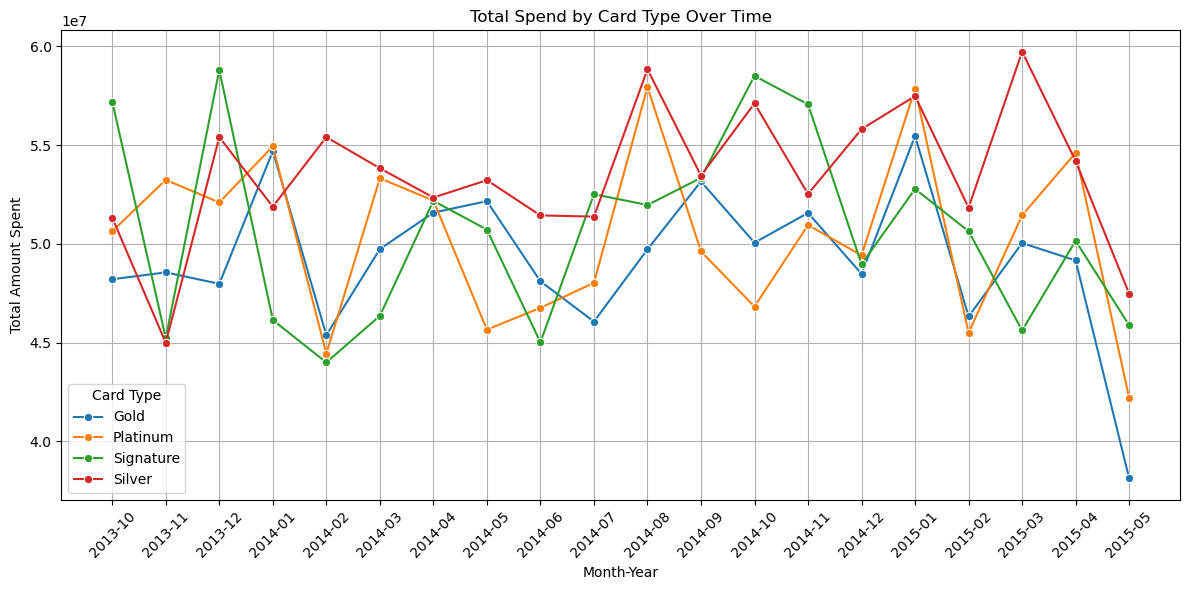

In [11]:
# Visualization: Line Plot of Total Spend by Card Type Over Time

# Group data by Card Type and Month-Year to calculate total spend
card_type_monthly_spend = df.groupby(['Card Type', 'Month-Year'])['Amount'].sum().reset_index()

# Debugging prints to verify the DataFrame
print("First few rows of the grouped DataFrame:")
print(card_type_monthly_spend.head())
print("\nDataFrame columns:", card_type_monthly_spend.columns)

# Check for NaN values
print("\nChecking for NaN values in the DataFrame:")
print(card_type_monthly_spend.isna().sum())

# Ensure 'Month-Year' is a string for plotting
card_type_monthly_spend['Month-Year'] = card_type_monthly_spend['Month-Year'].astype(str)

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Create a line plot for each Card Type
sns.lineplot(x='Month-Year', y='Amount', hue='Card Type', data=card_type_monthly_spend, marker='o')

# Set the title and labels for the plot
plt.title('Total Spend by Card Type Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines for easier visualization
plt.legend(title='Card Type')  # Add legend title
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()
